A PRESENTATION BY HENRY ASIEDU DADE
***********


MINISTRY OF TRADE

Wants to understand their trade patterns for 2014 and 2015

From this data, what can you see about the Ghanaian economy?
*************
***********
1. If an external investor wants to invest into the economy of Ghana, what should they look at?

2. Come up with your own structure on how to make the data more meaningful

3. Extract the meanings of the HS code

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [625]:
os.listdir()

In [596]:

trade = pd.read_excel("Copy of Data on TOP 100 EXPORT AND IMPORT  PRODUCTS (1).xlsx",sheet_name = ["EXPORT 2014","IMPORT 2014","EXPORT 2015","IMPORT 2015"])


ORGANIZING AND GETTING ALL THE DATA FROM THE EXCEL FILE

WE HAVE FOUR DATASETS, NAMELY:
*********
1. IMPORTS 2014 (df1)
2. IMPORT 2015  (df2)
3. EXPORT 2014  (df3)
4. EXPORT 2015  (df4)

GET ALL THE FOUR DATASET AND MERGE THEM

CLEAN THE DATA APPROPRIATELY AND ORGANIZE THEM INTO CATEGORIES

In [597]:
df1 = trade.get("IMPORT 2014")
df1 = df1.rename(columns = df1.iloc[0])
df1 = df1.iloc[1:,:]
df1[["Year","IMPORT/EXPORT"]] = [2014,'Import']
df1.sample(2)


,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
25,2837110000,Cyanides and cyanide oxides of sodium,118664946.66,16824950,2014,Import
11,1006309000,"Rice, semi-milled or wholly milled rice, pc...",74969496.93,26639922.71,2014,Import


In [598]:
df2 = trade.get("IMPORT 2015")
df2 = df2.rename(columns = df2.iloc[0])
df2 = df2.iloc[1:,:]
df2[["Year","IMPORT/EXPORT"]] = [2015,"Import"]
df2.sample(2)


,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
64,8481800000,"Other appliances such as taps, cocks and ot...",543721669.72,3690928.57,2015,Import
83,8703242010,"Other vehicles, with spark-ignition interna...",214065527.04,5951331.95,2015,Import


In [599]:
df3 = trade.get("EXPORT 2014")
df3 = df3.rename(columns = df3.iloc[0])
df3 = df3.iloc[1:,:]
df3[["Year","IMPORT/EXPORT"]] = [2014,'Export']
df3.sample(2)

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
16,1515901100,"Shea (karite) oil and fractions, crude",38235534.67,68529628.11,2014,Export
10,1207400000,Sesamum seeds,103849248.42,51030739.36,2014,Export


In [600]:
df4 = trade.get("EXPORT 2015")
df4 = df4.rename(columns = df4.iloc[0])
df4 = df4.iloc[1:,:]
df4[["Year","IMPORT/EXPORT"]] = [2015,"Export"]
df4.sample(2)

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
32,2517490000,"Granules, chippings and powder of stones (e...",36719079.67,4061720,2015,Export
25,2101110000,"Extracts, essences, concentrates and prepar...",161609318.47,621497.75,2015,Export


In [601]:
df = pd.concat([df1,df2,df3,df4], axis = 0)
df.sample(5)

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
27,3402200000,"Washing and cleaning preparations, put up f...",87773191.41,30917505.78,2015,Import
30,2306600000,Oil-cake and other solid residues of palm n...,169464403,3632438.81,2015,Export
34,2523100000,Cement clinkers,81835538.49,170425726.8,2015,Export
62,4408900000,"Other Veneer sheets and sheets for plywood,...",245698022.78,1618783.23,2014,Export
1,0206290000,Frozen edible bovine offal (excl. tongues a...,73247476.88,23295962.47,2014,Import


1. Let us investigate all the columns for null values, duplicates, whitespaces.
2. Convert all the values in the item description column into lowercase

In [602]:
df['ITEM DESCRIPTION'] = df['ITEM DESCRIPTION'].str.lower()
df.sample(2)

,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs),Year,IMPORT/EXPORT
35,3917219000,of polymers of ethylene not for water supply,117241606.87,2970458.5,2015,Import
43,2711130000,"butanes, liquefied",45796128.14,13764459.68,2015,Export


In [603]:
df['HS CODE'] = df['HS CODE'].str.strip()


Create a new column called 'main category' and store the 'HS CODES categories in them' 

In [604]:
df['MAIN CATEGORY'] = ''
df.insert(2, 'MAIN CATEGORY', df.pop('MAIN CATEGORY'))

In [624]:


# Define conditions for each category
conditions = [
    df['HS CODE'].between('01', '05'),
    #df['HS CODE'].str.startswith(('01', '02', '03', '04', '05')),
    df['HS CODE'].str.startswith(('06', '07','08', '09', '10', '11', '12', '13', '14')),
    df['HS CODE'].str.startswith('15'),
    df['HS CODE'].between('16', '24'),
    df['HS CODE'].str.startswith(('25', '26', '27')),
    df['HS CODE'].between('28', '38'),
    df['HS CODE'].str.startswith('39'),
    df['HS CODE'].between('40', '43'),
    df['HS CODE'].between('44', '49'),
    df['HS CODE'].between('50', '63'),
    df['HS CODE'].between('64', '67'),
    df['HS CODE'].str.startswith(('68', '69', '70', '71')),
    df['HS CODE'].between('72', '83'),
    df['HS CODE'].str.startswith('84'),
    df['HS CODE'].str.startswith('85'),
    df['HS CODE'].str.startswith('86'),
    df['HS CODE'].str.startswith('87'),
    df['HS CODE'].str.startswith('88'),
    df['HS CODE'].str.startswith('89'),
    df['HS CODE'].str.startswith('90'),
    df['HS CODE'].between('91', '98'),
]

# Define corresponding categories
choices = ['Animal Products','Vegetable Products','Fats & Oils','Prepared Foodstuffs','Mineral Products','Chemicals',
          'Plastics','Animal Skin','Wood Items', 'Paper Stuff or Wood Fiber Pulp','Textiles',
           'Footwear / Headgear','Stone / Glass','Real or Grown Pearls','Base Metals','Machinery / Electrical','Transportation','Precision Instruments',
           'Ammunition','Various Finished Goods','Works of Art']

# Use np.select to create the 'MAIN CATEGORY' column
df['MAIN CATEGORY'] = np.select(conditions, choices, default='Other')

df.sample(5)


,HS CODE,ITEM DESCRIPTION,MAIN CATEGORY,CUSTOM VALUE (GHS),CUSTOM VALUE (USD),NETWEIGHT (KGs),Year,IMPORT/EXPORT,First Digit
66,4412990000,"other plywood, nes",Wood Items,25135874,5027174,5004613,2014,Export,2
81,7206100000,"ingots of iron and non-alloy steel, nes",Stone / Glass,20944187,4188837,3455020,2014,Export,2
54,8411820000,"gas turbines, nes, of a power >5000kw",Real or Grown Pearls,77231854,15446370,129703,2014,Import,7
18,1801001100,"cocoa beans, superior quality raw beans",Prepared Foodstuffs,10146575221,2029315044,605771787,2015,Export,1
27,3402200000,"washing and cleaning preparations, put up f...",Chemicals,87773191,17554638,30917505,2015,Import,8


In [606]:
print("How many unique values do we have under 'main category column'?\n")
print(f"We have {df['MAIN CATEGORY'].nunique()} unique values in the main category column")

How many unique values do we have under 'main category column'?

We have 21 unique values in the main category column


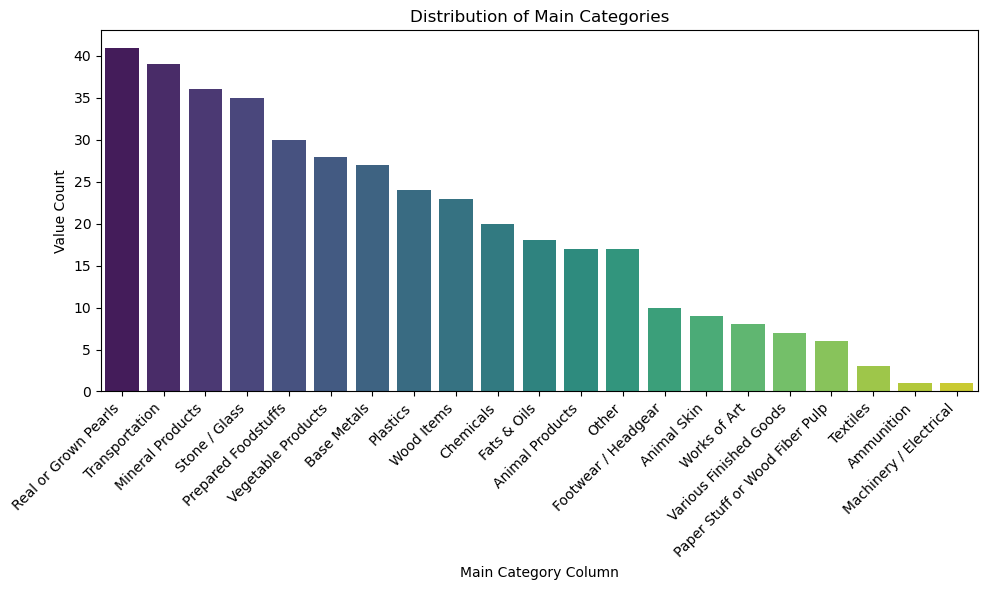

In [607]:


category_counts = df['MAIN CATEGORY'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Main Categories')
plt.xlabel('Main Category Column')
plt.ylabel('Value Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In our Dataset we have Real and Grown Pearls as the highest distribution value count in the Trade Dataset
*********************
### Key Insights:
1. High Trade Volume: "Real and Grown Pearls" emerge as the highest value count in the dataset, indicating a significant trade volume in these items.

2. Global Demand: The prominence of pearls suggests a global demand for these precious items. Understanding the factors driving this demand is crucial for market analysis.

3. Cultural and Economic Significance: Pearls often hold cultural and economic significance. They are used in jewelry, accessories, and traditional items, contributing to their high trade value.

4. Luxury Market Influence: The dominance of pearls could indicate a strong presence in the luxury goods market, where these items are highly valued for their rarity and beauty.
***********************
### Implications:
1. Market Opportunities: Investors may find opportunities in the pearl industry, considering the consistent demand and potential for growth.

2. Diversification Strategies: Businesses involved in pearl trade may explore diversification strategies to capitalize on the high market demand and maintain a competitive edge.

3. Consumer Preferences: Understanding consumer preferences for pearls can guide marketing and product development efforts, ensuring alignment with market trends.

4. Supply Chain Considerations: Given the importance of pearls, evaluating and securing a stable supply chain becomes crucial to meet market demands.
**********************
#### Recommendations:
1. Market Research:
Conduct in-depth market research to identify the specific factors driving the demand for "Real and Grown Pearls

**********
**********
#### Top 5 Main Categories in Trade Dataset

These notes provide a breakdown of the top 5 main categories, offering insights into the diverse range of products within each category. Further analysis can delve into specific market trends and trade dynamics for each subproduct

******

1. Real and Grown Pearls:
- Natural Pearls
- Cultured Pearls
- Pearl Jewelry
***************************
***************
2. Transportation:
- Motor Vehicles
- Aircraft
- Railway Equipment
- Ships and Boats
*************************************************
*****************
3. Mineral Products:
- Petroleum Oils
- Natural Gas
- Iron Ore
- Copper Ores

***********************************************
*************
4. Stone / Glass:
- Granite
- Marble
- Glassware
- Ceramic Products
************
***********************
5. Prepared Foodstuffs:
- Tomato Paste
- Sugar Products
- Edible Oils
- Processed Seafood
##### Insights:
"Prepared Foodstuffs" cover a range of processed and packaged food items, highlighting trade in food products ready for consumption.


In [608]:
df['MAIN CATEGORY'].value_counts()

MAIN CATEGORY
Real or Grown Pearls              41
Transportation                    39
Mineral Products                  36
Stone / Glass                     35
Prepared Foodstuffs               30
Vegetable Products                28
Base Metals                       27
Plastics                          24
Wood Items                        23
Chemicals                         20
Fats & Oils                       18
Animal Products                   17
Other                             17
Footwear / Headgear               10
Animal Skin                        9
Works of Art                       8
Various Finished Goods             7
Paper Stuff or Wood Fiber Pulp     6
Textiles                           3
Ammunition                         1
Machinery / Electrical             1
Name: count, dtype: int64

In [609]:
df = df.astype({"CUSTOM VALUE (GHS)":"int64","NETWEIGHT (KGs)":"int64"})

In [610]:
df['CUSTOM VALUE (USD)'] = ''
df.insert(4, 'CUSTOM VALUE (USD)', df.pop('CUSTOM VALUE (USD)'))

In [611]:
rate = 5

df['CUSTOM VALUE (USD)'] = df['CUSTOM VALUE (GHS)']/ rate


In [612]:
df = df.astype({"CUSTOM VALUE (USD)":"int64"})


In [613]:
maindf =df
maindf.sample(3)

,HS CODE,ITEM DESCRIPTION,MAIN CATEGORY,CUSTOM VALUE (GHS),CUSTOM VALUE (USD),NETWEIGHT (KGs),Year,IMPORT/EXPORT
69,8504340000,"transformers, nes, power handling capacity ...",Base Metals,342047438,68409487,5498088,2014,Import
3,0303530000,"fish, frozen, excluding fish fillets and ot...",Animal Products,114179148,22835829,44397204,2015,Import
16,1515901900,"shea (karite) oil and fractions, refined",Fats & Oils,113626500,22725300,41187134,2015,Export


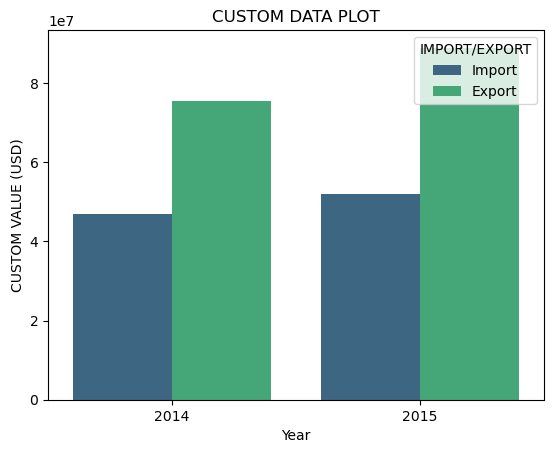

In [614]:
sns.barplot(x='Year', y='CUSTOM VALUE (USD)', hue='IMPORT/EXPORT', data=df, palette = "viridis", errorbar = None)
plt.title("CUSTOM DATA PLOT")
plt.show()

*************
This note captures the essence of the trade dynamics, emphasizing the growth and potential opportunities associated with the increased export and import values in 2015

***********
The trade data for 2015 reveals a substantial increase in both export and import values compared to the preceding year, 2014. This surge underscores the dynamic economic activity during 2015, indicating robust international trade interactions

**********
This positive trend in trade values for 2015 sets an optimistic tone for economic growth and international engagement, showcasing the resilience and competitiveness of the country in the global marketplace.



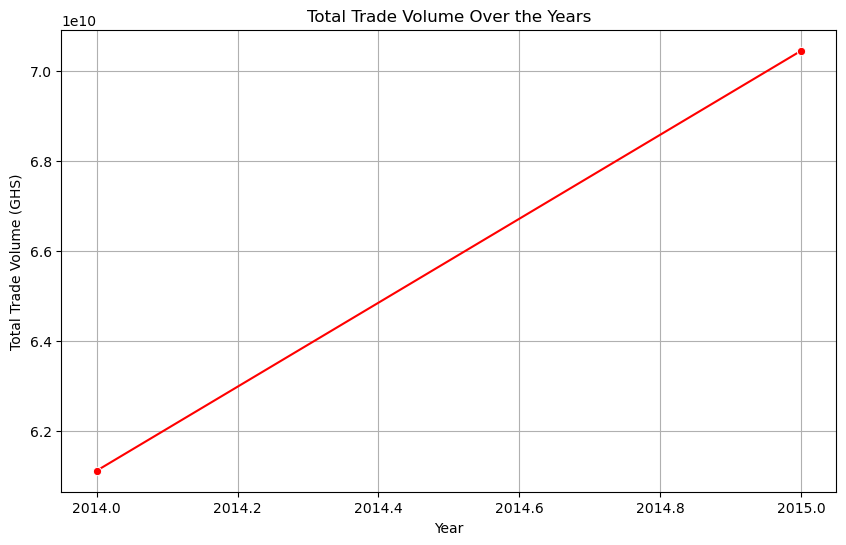

In [615]:
# Group the data by year and sum the custom values
total_trade_volume = df.groupby('Year')['CUSTOM VALUE (GHS)'].sum().reset_index()

# line plot creation
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CUSTOM VALUE (GHS)', data=total_trade_volume, marker='o', color='red')
plt.title('Total Trade Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Trade Volume (GHS)')
plt.grid(True)
plt.show()


**********
This positive trend in trade values for 2015 sets an optimistic tone for economic growth and international engagement, showcasing the resilience and competitiveness of the country in the global marketplace.
*********

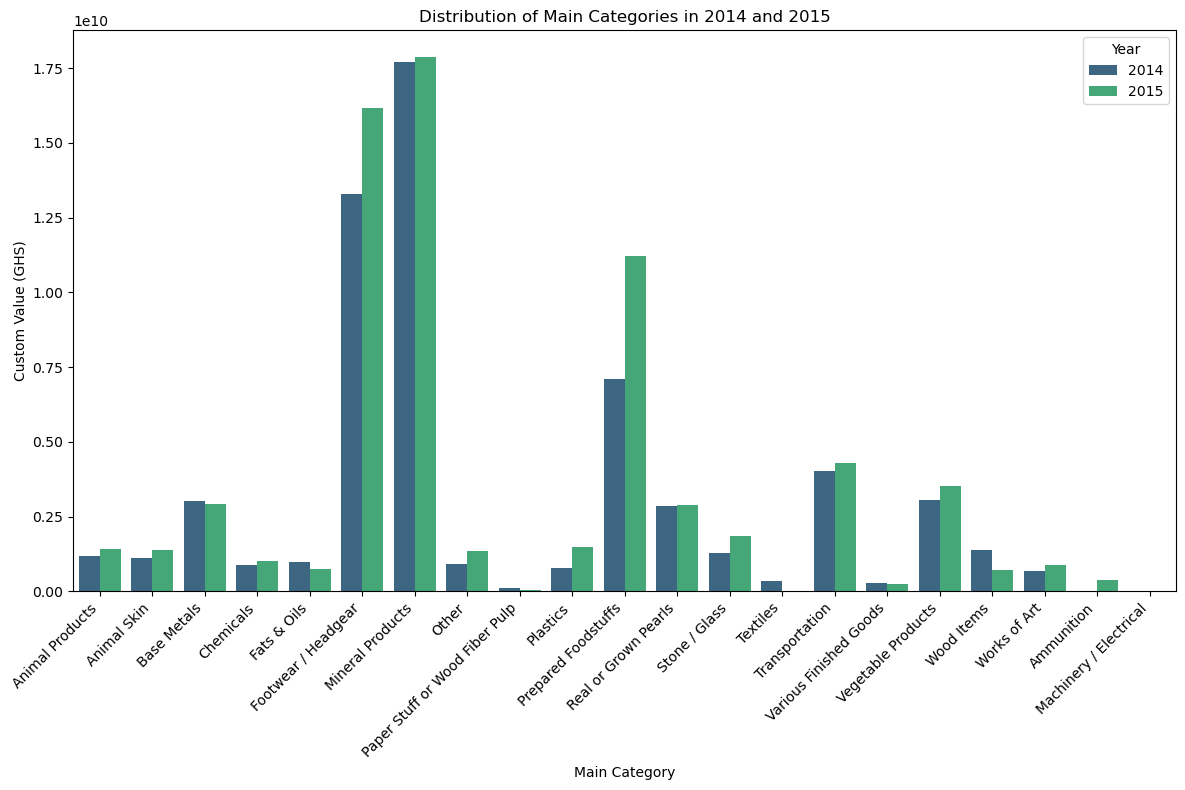

In [616]:
category_distribution = df.groupby(['Year', 'MAIN CATEGORY'])['CUSTOM VALUE (GHS)'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='MAIN CATEGORY', y='CUSTOM VALUE (GHS)', hue='Year', data=category_distribution, palette='viridis')
plt.title('Distribution of Main Categories in 2014 and 2015')
plt.xlabel('Main Category')
plt.ylabel('Custom Value (GHS)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()


**********
This note offers an overview of the factors contributing to the prominence of minerals in the trade distribution, providing context for the observed trade patterns
**********

"Mineral Products" emerged as the top category in trade, showcasing a substantial contribution to the overall custom values. This observation is backed by the following key factors:

1. Economic Importance:
Minerals, being crucial raw materials, are integral to various industries, including energy, manufacturing, and construction. The high custom values indicate a robust trade in minerals, reflecting their economic importance.
*********
*********
2. Resource-Rich Landscape:
The country's resource-rich landscape, potentially abundant in minerals like petroleum, natural gas, and ores, contributes to the dominance of the "Mineral Products" category. The trade in these resources is vital for meeting both domestic and international demands.
*************
**********
3. Global Demand for Raw Materials:
The global demand for minerals, driven by industrial and technological advancements, positions the country as a key player in the international supply chain. The observed trade values underscore the country's role as a significant contributor to global mineral markets
***********

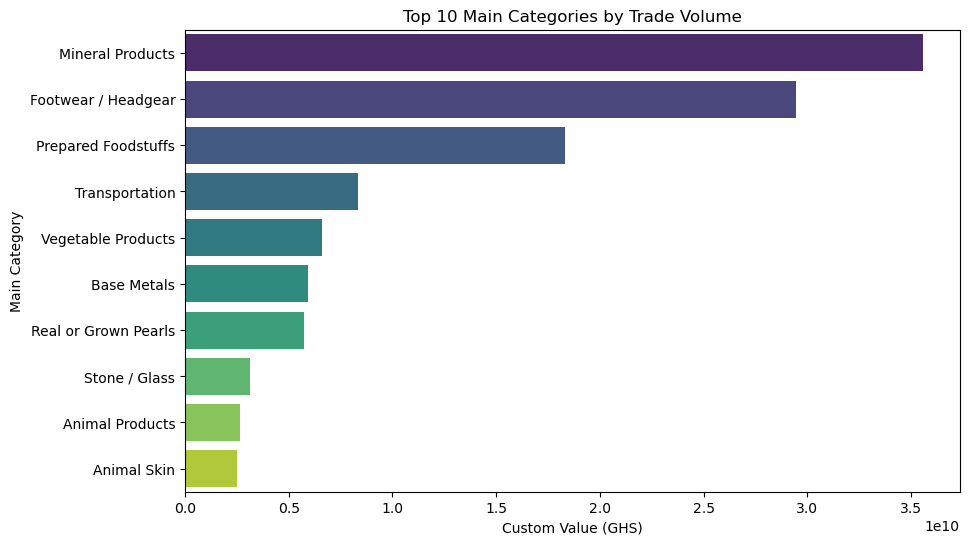

In [617]:
top_categories = df.groupby('MAIN CATEGORY')['CUSTOM VALUE (GHS)'].sum().reset_index()

# Sort the data by custom value in descending order to get the top categories
top_categories = top_categories.sort_values(by='CUSTOM VALUE (GHS)', ascending=False)

# Select the top Number of categories
top_n = 10
top_categories = top_categories.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='CUSTOM VALUE (GHS)', y='MAIN CATEGORY', data=top_categories, palette='viridis')
plt.title(f'Top {top_n} Main Categories by Trade Volume')
plt.xlabel('Custom Value (GHS)')
plt.ylabel('Main Category')
plt.show()


This note offers an overview of the factors contributing to the prominence of the top 10 trade distribution, providing context for the observed trade patterns
**********
We have the foloowing coming out as the top 10, Using thier the custom value generated in both 2014 and 2015:

- Minerals Products
- Footwear
- Prepared footstuff
- Transportation
- Vegatable Products
- Base metals
- Real or Grown Pearls
- Stone / Glass
- Animal Products
- Animal Skin
***********

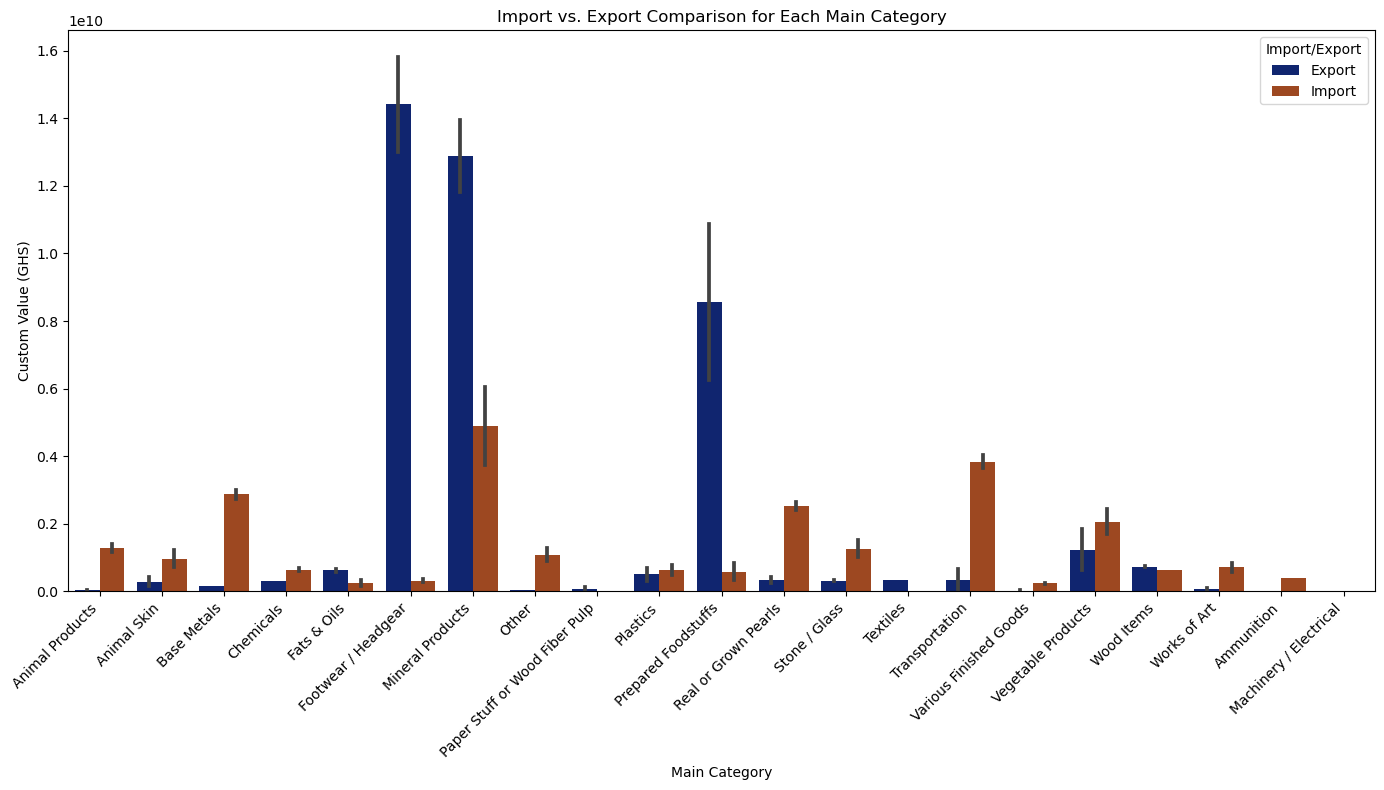

In [618]:
import_export_comparison = df.groupby(['Year', 'MAIN CATEGORY', 'IMPORT/EXPORT'])['CUSTOM VALUE (GHS)'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='MAIN CATEGORY', y='CUSTOM VALUE (GHS)', hue='IMPORT/EXPORT', data=import_export_comparison, palette='dark')
plt.title('Import vs. Export Comparison for Each Main Category')
plt.xlabel('Main Category')
plt.ylabel('Custom Value (GHS)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Import/Export', loc='upper right')
plt.tight_layout()
plt.show()


********
This note encapsulates the significance of comparing import and export values in evaluating the economic landscape and formulating informed policies

The analysis offers a comprehensive understanding of the nation's engagement in global commerce, highlighting the following key aspects:

- Trade Balance
- Market Competitivness
- Economic Interdependence
****************

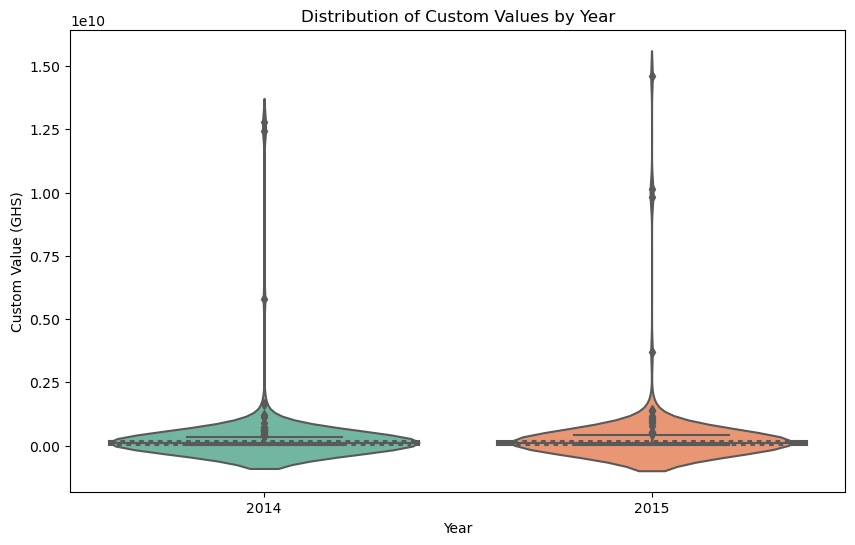

In [619]:
# Create a box plot and violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='CUSTOM VALUE (GHS)', data=df, palette='Set2')

sns.violinplot(x='Year', y='CUSTOM VALUE (GHS)', data=df, palette='Set2', inner='quartile')

plt.title('Distribution of Custom Values by Year')
plt.xlabel('Year')
plt.ylabel('Custom Value (GHS)')
plt.show()


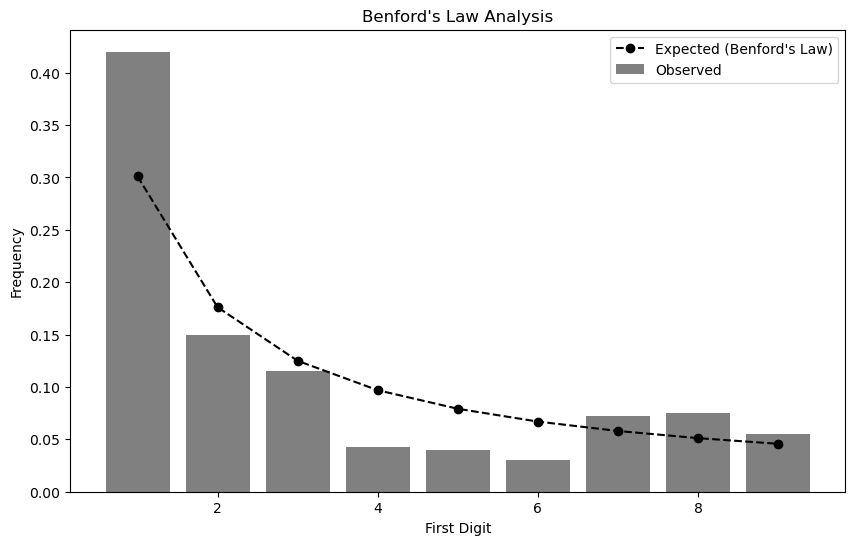

In [620]:
#Let Us do some benfords law analysis here
# Extract the first digit from the custom values
df['First Digit'] = df['CUSTOM VALUE (GHS)'].astype(str).str[0].astype(int)

# Calculate the observed frequencies
observed_freq = df['First Digit'].value_counts(normalize=True).sort_index()

# Calculate the expected frequencies according to Benford's Law
expected_freq = np.log10(1 + 1 / np.arange(1, 10))

plt.figure(figsize=(10, 6))
plt.bar(observed_freq.index, observed_freq, label='Observed', color='grey')
plt.plot(np.arange(1, 10), expected_freq, marker='o', linestyle='dashed', color='black', label='Expected (Benford\'s Law)')
plt.title('Benford\'s Law Analysis')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.legend()
plt.show()


This note encapsulates the application of Benford's Law in scrutinizing custom values column, emphasizing its role in detecting anomalies, ensuring data integrity, and providing a valuable tool for financial analysis
*********

The application of Benford's Law to the custom values (GHS) enables the detection of irregularities, anomalies, or conformity to expected patterns in the dataset.

##### Key Insights:

Natural Distribution:

According to Benford's Law, in naturally occurring datasets, smaller digits like 1 and 2 are expected to occur more frequently as leading digits compared to larger digits. This principle arises from real-world processes that naturally produce numbers adhering to this distribution.

In our visualization we an almost perfect representation and confromation using the benfords law, 
*************

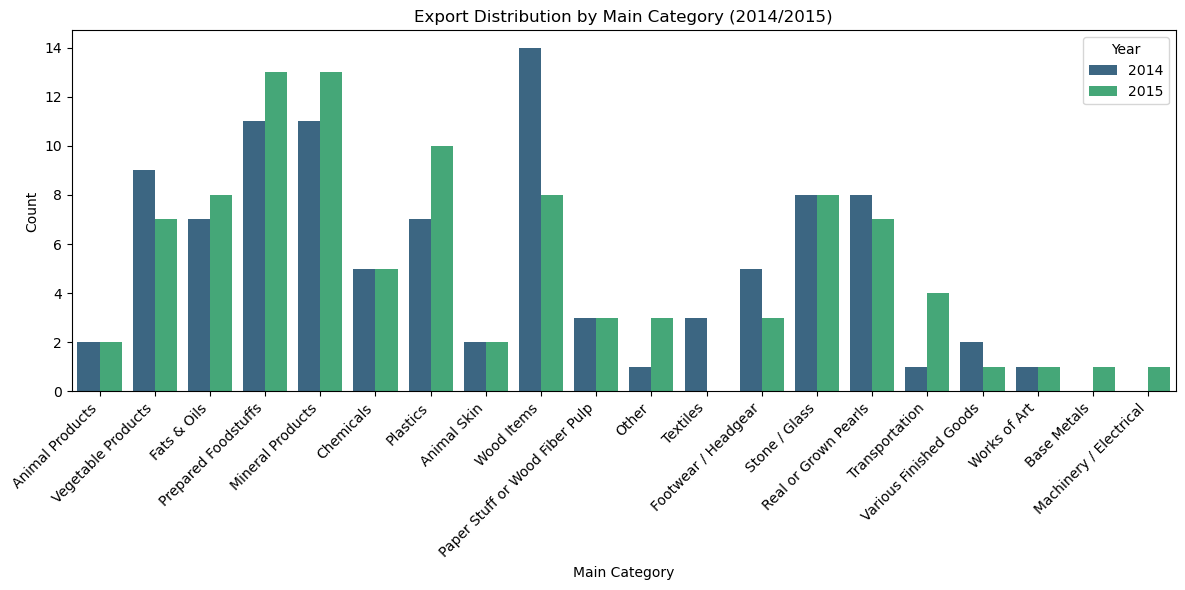

In [627]:
export_data = df[df['IMPORT/EXPORT'] == 'Export']

# Create a count 
plt.figure(figsize=(12, 6))
sns.countplot(data=export_data, x='MAIN CATEGORY', hue='Year', palette='viridis')

# Customize plot aesthetics
plt.title("Export Distribution by Main Category (2014/2015)")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()

*******
A visualization of export distribution of products for 2014 and 2015

******
From the visualization we can see the top 3 exports for both years listed below

1. Woods Items
- charcoal
- Lumber
- wood pulp
********
********
2. Mineral Products:
- Petroleum Oils
- Natural Gas
- Iron Ore
- Copper Ores

***********************************************
*******************
3. Prepared Foodstuffs:
- Tomato Paste
- Sugar Products
- Edible Oils
- Processed Seafood
******

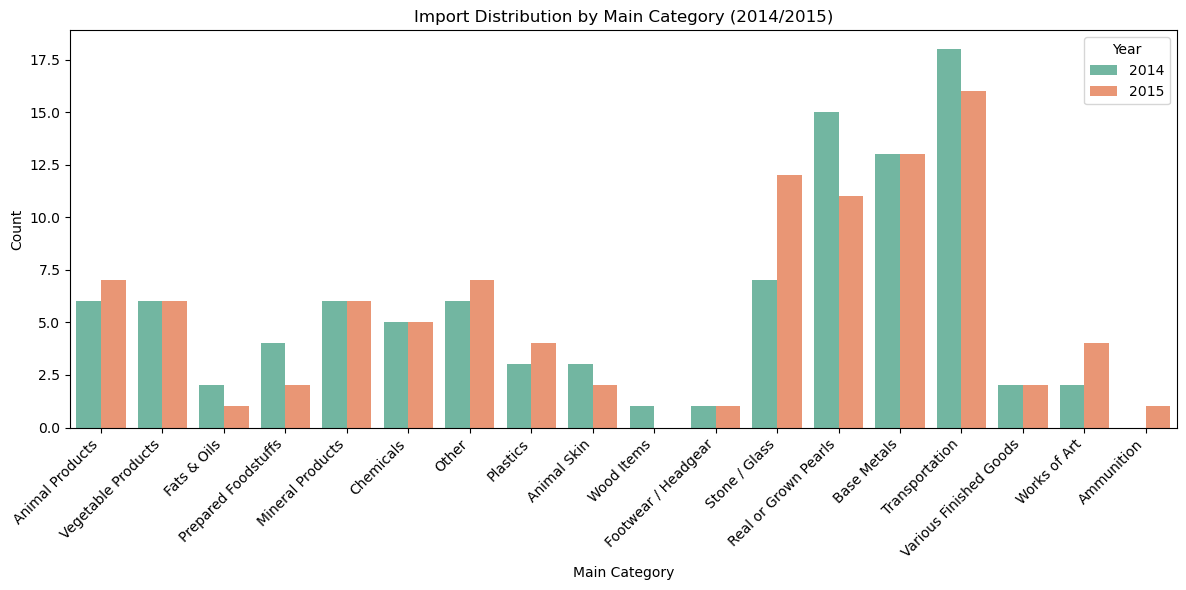

In [626]:
import_data = df[df['IMPORT/EXPORT'] == 'Import']

plt.figure(figsize=(12, 6))
sns.countplot(data=import_data, x='MAIN CATEGORY', hue='Year', palette='Set2')

# Customize plot aesthetics
plt.title("Import Distribution by Main Category (2014/2015)")
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()

*******
A visualization of import distribution of products for 2014 and 2015

*******
From the visualization we can see the top 2 imports for both years listed below

1. Transportation
- Motor Vehicles
- Aircraft
- Railway Equipment
- Ships and Boats
*************
**********
2. Real and Grown Pearls:
- Natural Pearls
- Cultured Pearls
- Pearl Jewelry
**************